*Methodologies*:

1. detect corners, threshold it, then join the corners, then find the area (not working properly)

2. use edge detection, clean it, then find the area

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

-------------*using corner detection*-------------

In [15]:
# Input image. It should be grayscale and float32 type.
img=cv.imread("./cardboard.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

In [16]:
corners = cv.cornerHarris(gray,2,3,0.04)
corner_img=img.copy()


# Corner coordinates
corner_coords = np.argwhere(corners > 0.01*corners.max())
# print(len(corner_coords[0]))

corner_img[corners > 0.05*corners.max()]=[0,0,255]

font=cv.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_color = (0, 255, 0)  # Green color in BGR
font_thickness = 2

# for i in range(len(corner_coords)):
# cv.putText(corner_img, f"{corner_coords[99]}", corner_coords[99], font, font_scale, font_color, font_thickness)



cv.imshow('corners_connected',corner_img)
if cv.waitKey(0) & 0xff == 27:
 cv.destroyAllWindows()

-------------*using edge detection*-------------

In [17]:
img=cv.imread("./cardboard.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [18]:
# canny
edges = cv.Canny(img,100,200)
cv.imshow("canny",edges)
if cv.waitKey(0) & 0xff == 27:
 cv.destroyAllWindows()

-------------*GrabCut*-------------

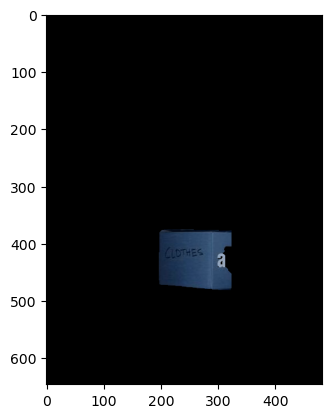

In [26]:
# Grabcut
cv.namedWindow('Select ROI', cv.WINDOW_NORMAL | cv.WINDOW_KEEPRATIO | cv.WINDOW_GUI_EXPANDED) #to enable resizable window

cv.destroyWindow('Select ROI')

r = cv.selectROI("select the area", img)  #top left + bottom right coordiantes
  

mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
foreground = np.zeros((1,65), np.float64)

# Run GrabCut to segment the object
cv.grabCut(img, mask, r, background, foreground, 5, cv.GC_INIT_WITH_RECT)

# Create a mask with the foreground pixels (1) and probable foreground pixels (3)
mask2 = np.where((mask==1) + (mask==3), 255, 0).astype('uint8')
result=cv.bitwise_and(img,img,mask=mask2)
plt.imshow(result)
cv.waitKey(0)
cv.destroyAllWindows()